# 報告者：尚晋

<pre>
目次：
◆簡単に自己紹介（出身地、趣味など）
◆春学期の登録授業と目標点数/目標評価の辞書を作る
◆「山上さんを助けて！」提案システムを作成
今山上さんが10万円の元金を持っている、鶏を買って卵を売る商売をやろうとしている。鶏一匹ごとに1000円で買える、200円でレンタルできる、卵の売価は一個30円。ここは鶏が毎日一個の卵を産むこととする。
三つのパータンで商売できる。
提案（１）全てのお金を鶏を買って、卵を売る。一年の所得S1を計算する。
提案（２）全てのお金を鶏をレンタルして、卵を売る。一年の所得S2を計算する。
提案（３）まず全てのお金を鶏をレンタルして、Aという会社に市場売価より低い売価20円で売ることを承諾し、また持っている土地を担保に出して、A会社から事前に一年分の卵のお金を支払ってくれる。その事前払いでもらったお金を鶏をレンタルして、卵を売る。一年の所得S3を計算する。
山上さんの目標所得income_goalを聞いて、どのパータンを選ぶのかを提案してあげてください。（この目標所得は皆さんご自身で設定してください。）
どれを選ぶかの基準:もしincome_goal<=S1, パータン(1)を選ぶ、もしS1<income_goal<=S2, パータン(2)を選ぶ、もしS2<income_goal<=S3, パータン(3)を選ぶ, income_goal>S1, "実現できない"と提示する。
◆機械学習の実践（下記のデータセットから一つ選んで、機械学習のモデルに応用）
16 Best Sklearn Datasets for Building Machine Learning Models
https://hackernoon.com/16-best-sklearn-datasets-for-building-machine-learning-models
<pre>

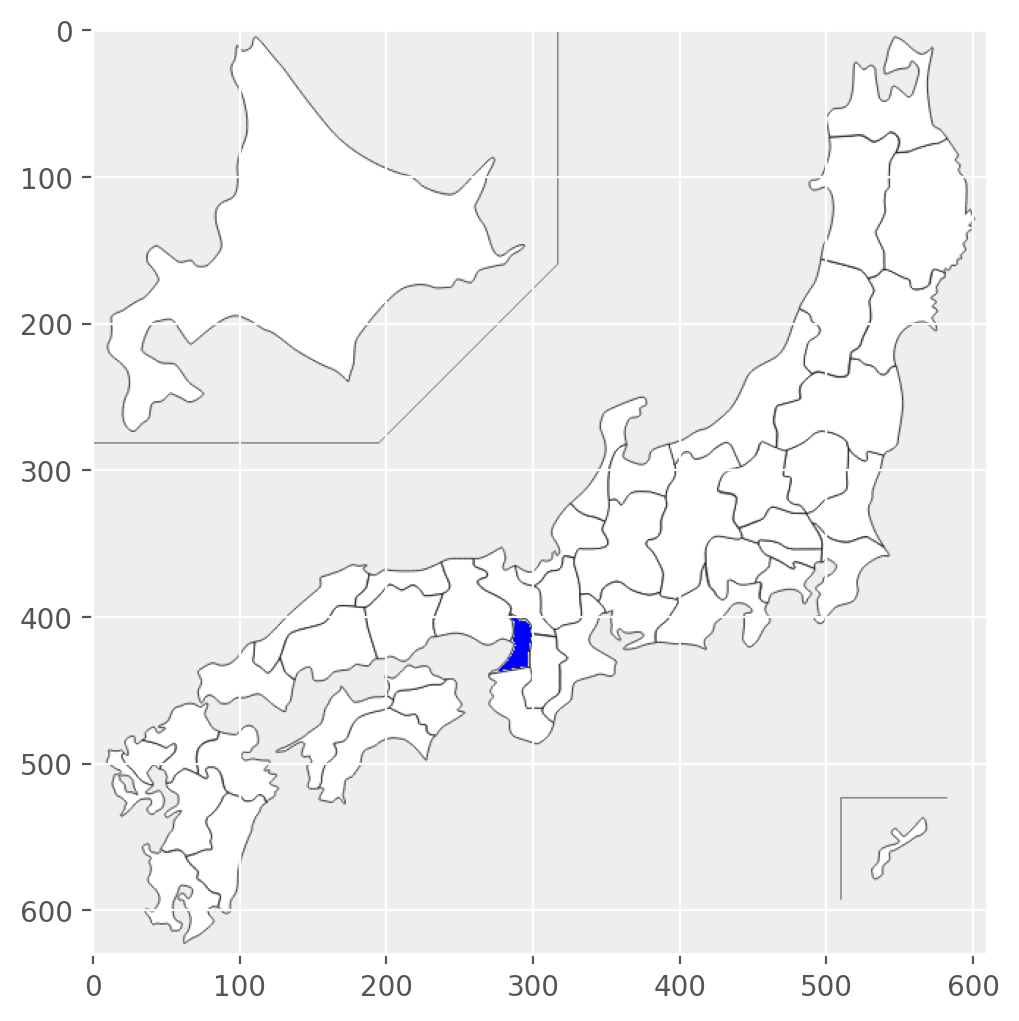

In [61]:
%config InlineBackend.figure_formats = {'png', 'retina'}
%matplotlib inline
import matplotlib.pyplot as plt
from japanmap import picture
plt.rcParams['figure.figsize'] = 6, 6
plt.imshow(picture());

plt.imshow(picture({'大阪': 'blue'}));

In [1]:
my_interests = list['釣り', '泳ぐ', 'バトミントン', '卓球', 'サッカー観戦', '将棋', '書道']
my_interests

list['釣り', '泳ぐ', 'バトミントン', '卓球', 'サッカー観戦', '将棋', '書道']

In [4]:
my_courses_grade_goal = {'英語':90, '線形代数':90, '化学':90, '物理':90, '計算機プログラミング基礎及び演習':90, '基礎セミナー':90}
my_courses_grade_goal

{'英語': 90,
 '線形代数': 90,
 '化学': 90,
 '物理': 90,
 '計算機プログラミング基礎及び演習': 90,
 '基礎セミナー': 90}

#  logistic regression application example: Titanic
https://www.kaggle.com/c/titanic/data

## 機械学習の実践

<pre>
使用モデルを簡単に紹介：
ロジスティック回帰は、対象となるあるものが特定のクラスに属する確率を予測するために、機械学習で使用される分類アルゴリズムです。
複数の入力変数と、出力変数(例えば：Yes/no、True/False、1/0 など) との関係

目的：タイタニック号の乗客の情報を利用して、各乗客が生き残るか否かを予測するモデルの作成  
データ: PassengerId 乗客のID
           survival(0 = No, 1 = Yes)  生存 0 = いいえ、1 = はい
           pclass(Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd)、チケットクラス  
           Sex(male, female)、性別  
           Age、年齢  
           SibSp(siblings / spouses aboard the Titanic)、同乗していた兄弟/配偶者の数  
           Parch(parents / children aboard the Titanic)、同乗していた親と子供の数  
           Ticket(Ticket number)、チケット番号  
           Fare(Passenger fare)、運賃  
           Cabin(Cabin number)、客室番号  
           Embarked(Port of Embarkation)  どの港でタイタニックに乗った
<pre>

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline
plt.style.use('ggplot')

In [64]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
# Remove missing values
titanic.dropna(inplace=True)

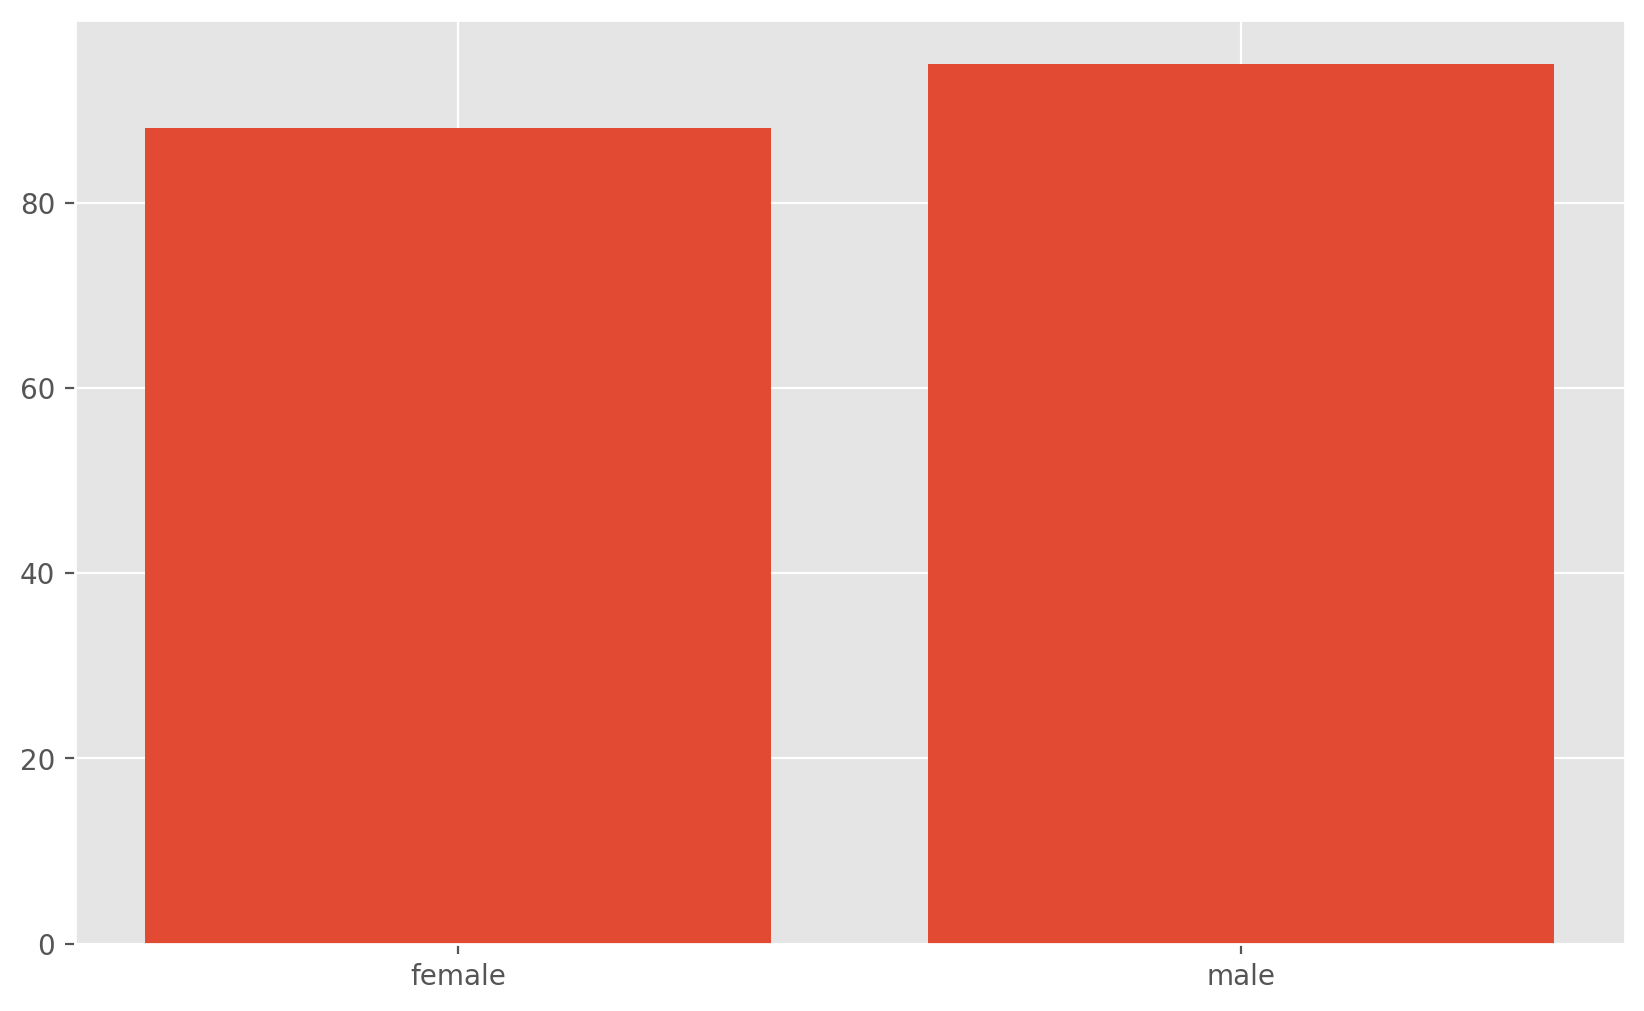

In [67]:
tmp = titanic.groupby('Sex').agg({'Sex':'count'}).rename(columns={'Sex':'count_sex'})
plt.figure(figsize =(10,6))
plt.bar(tmp.index, tmp.count_sex)
plt.show()

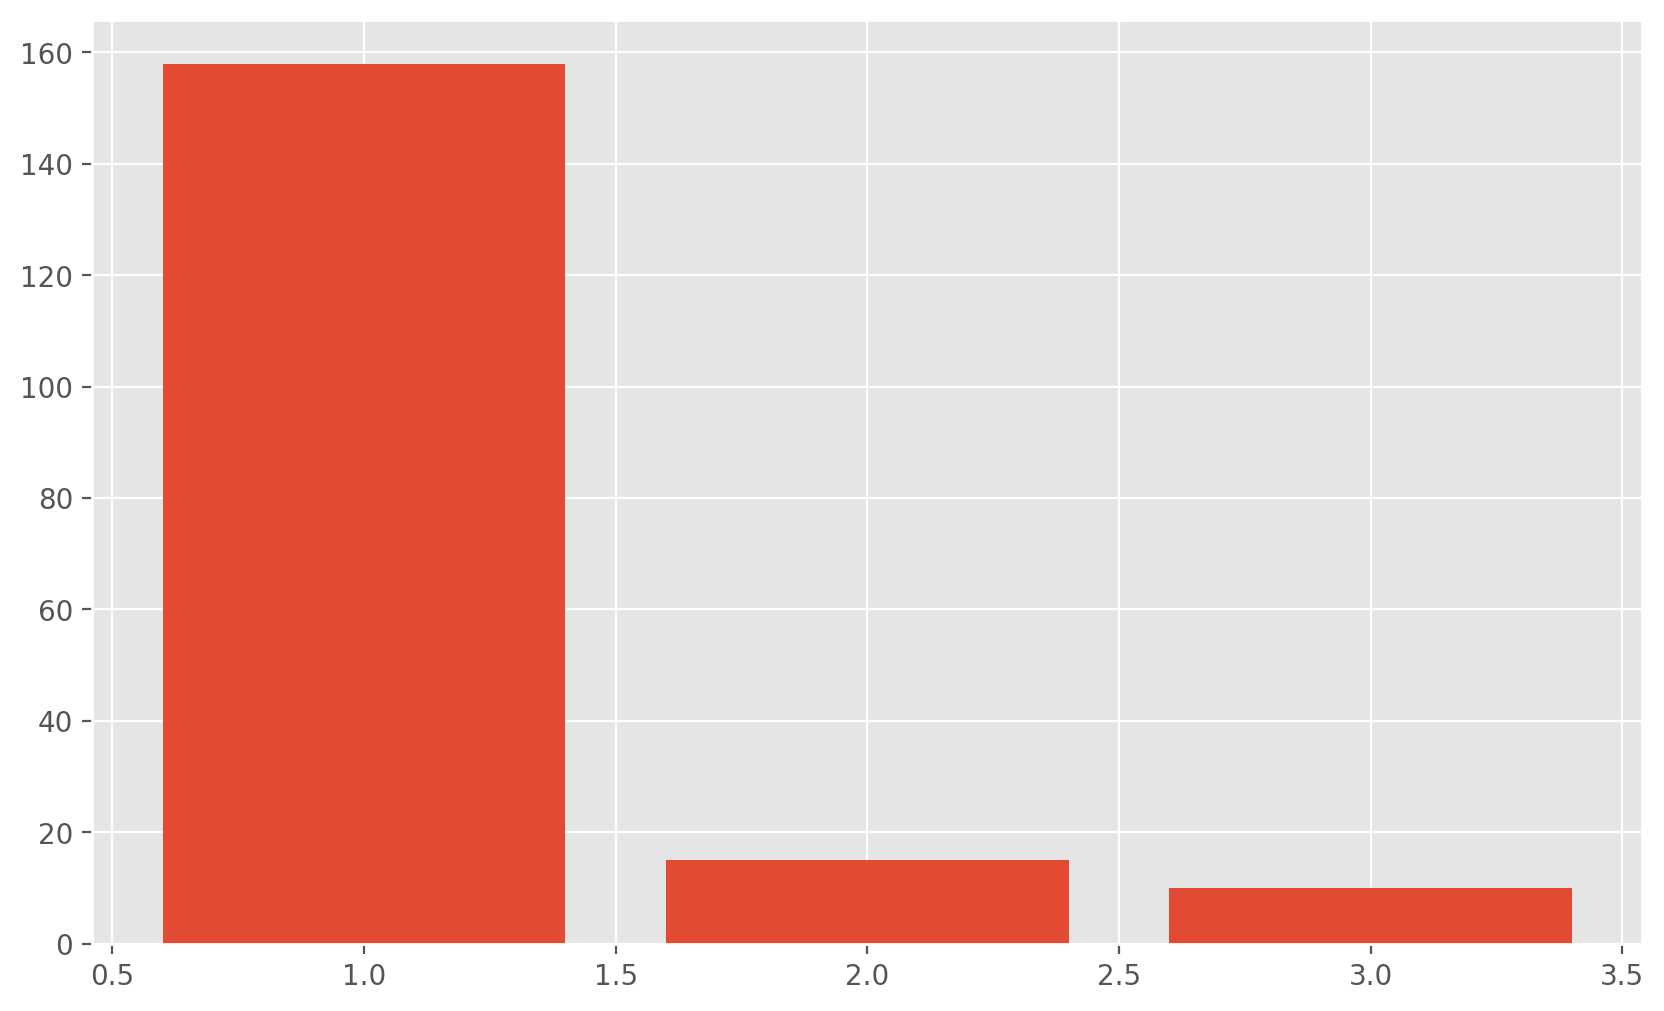

In [68]:
tmp = titanic.groupby('Pclass').agg({'Sex':'count'}).rename(columns={'Sex':'count_Pclass'})
plt.figure(figsize =(10,6))
plt.bar(tmp.index, tmp.count_Pclass)
plt.show()

D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


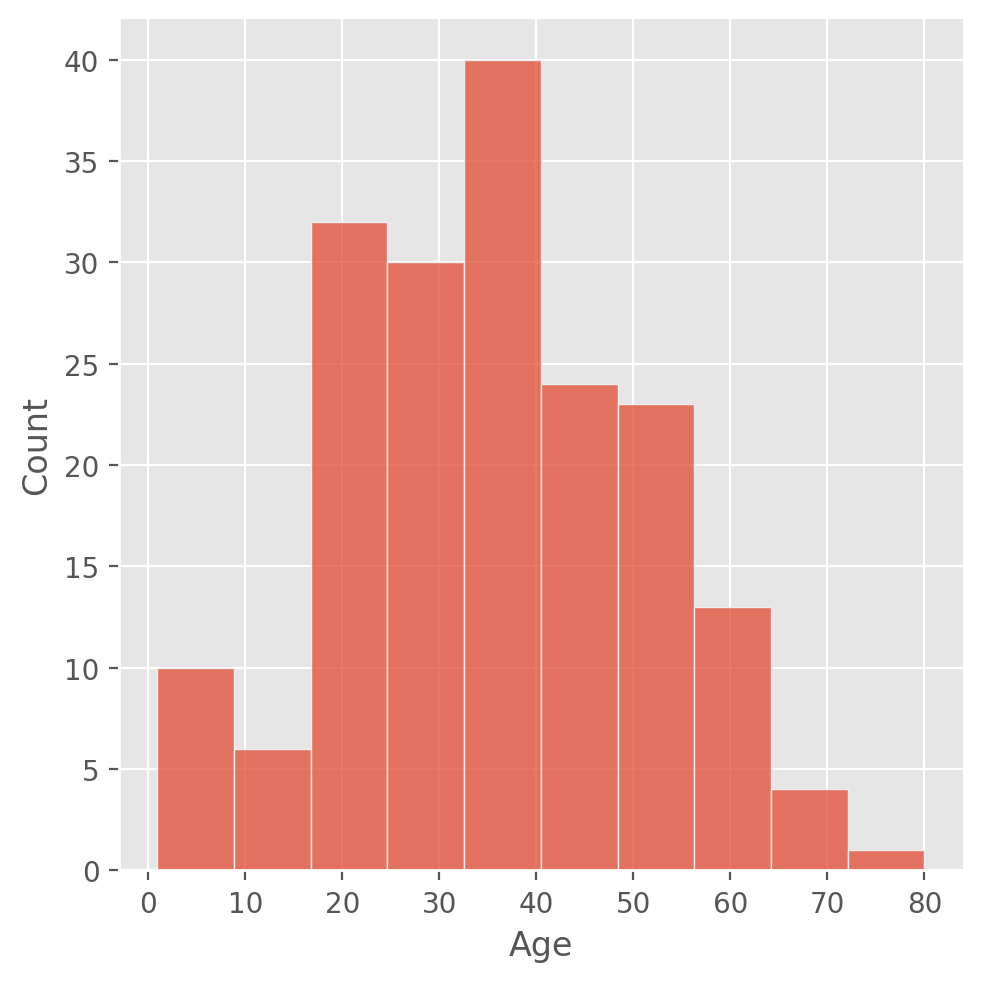

In [69]:
import seaborn as sns
sns.displot(titanic['Age'])

In [70]:
# Convert categorical variables into numerical ones
titanic['Sex'] = titanic['Sex'].map({'female': 0, 'male': 1})
titanic['Embarked'] = titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [71]:
# Select the features and target variable
X = titanic[['Age', 'Sex', 'Pclass','SibSp', 'Parch', 'Embarked']]
y = titanic['Survived']

In [72]:
X

,Age,Sex,Pclass,SibSp,Parch,Embarked
1,38.0,0,1,1,0,0
3,35.0,0,1,1,0,2
6,54.0,1,1,0,0,2
10,4.0,0,3,1,1,2
11,58.0,0,1,0,0,2
...,...,...,...,...,...,...
871,47.0,0,1,1,1,2
872,33.0,1,1,0,0,2
879,56.0,0,1,0,1,0
887,19.0,0,1,0,0,2


In [73]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [74]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Build the logistic regression model
model = LogisticRegression(random_state=42)

In [76]:
# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [77]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [78]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.7297297297297297


In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 7,  3],
       [ 7, 20]], dtype=int64)

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [81]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[ 7  7]
 [ 3 20]]


In [82]:
score=accuracy_score(y_test,y_pred)
print(score)

0.7297297297297297


In [83]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.74      0.87      0.80        23

    accuracy                           0.73        37
   macro avg       0.72      0.68      0.69        37
weighted avg       0.73      0.73      0.72        37



Confusion matrix, without normalization


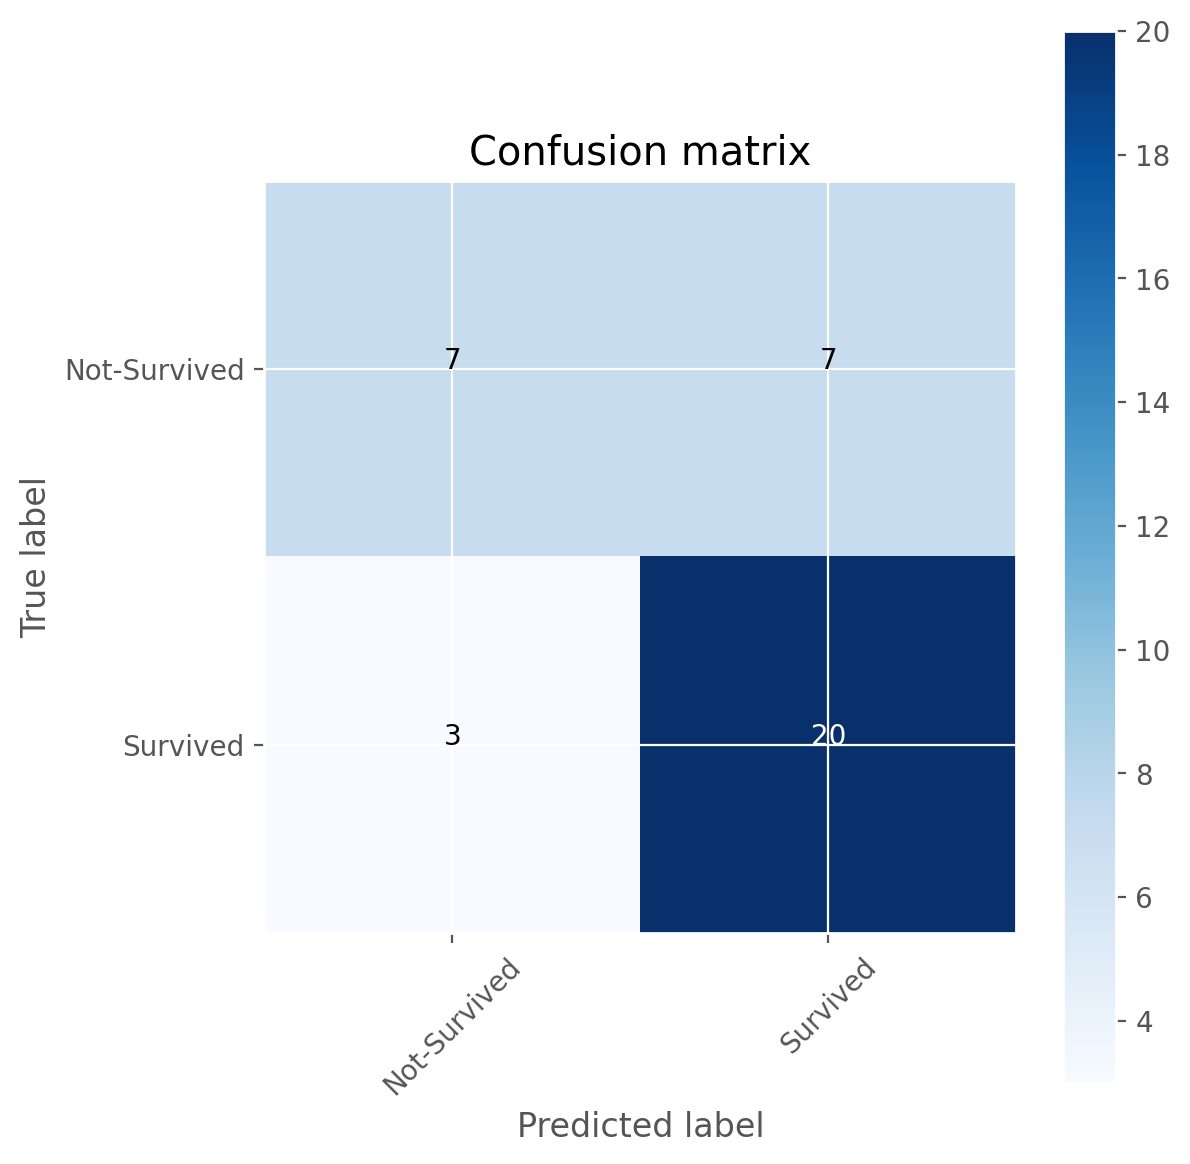

In [84]:
plot_confusion_matrix(matrix, classes=['Not-Survived', 'Survived'])